In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

vol of vol

In [ ]:
def vol_of_vol(univariate_series, rolling_periods):
  return ( univariate_series.rolling(window=rolling_periods).std() * np.sqrt(252) ).iloc[rolling_periods-1:]

In [ ]:
sample = vol_of_vol(univariate_series= us_panel, rolling_periods=252)

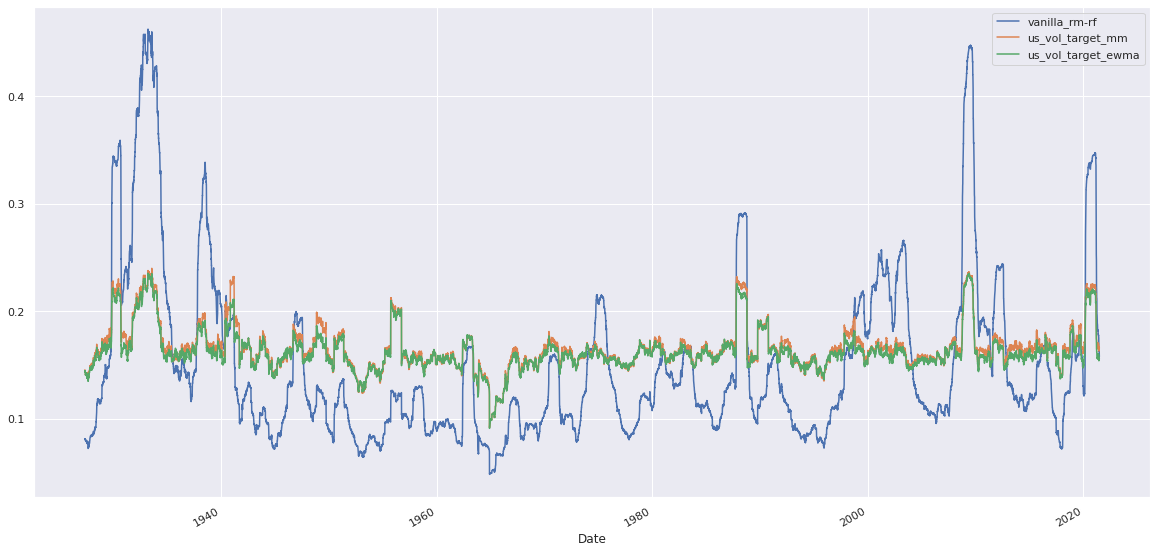

In [ ]:
sample.plot()

vanilla_rm-rf         8.020572
us_vol_target_mm      2.098261
us_vol_target_ewma    1.945567
dtype: float64


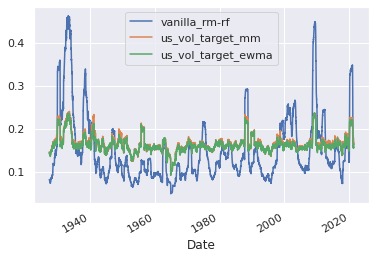

In [ ]:
us_panel = pd.read_csv('/content/us_vol_target.csv', index_col = 0, header = [0], parse_dates = ['Date'])

us_rolling_vol = us_panel.rolling(window=252).std() * np.sqrt(252)

us_rolling_vol.plot()

print(us_rolling_vol.std() * 100)

In [ ]:
us_panel

,vanilla_rm-rf,us_vol_target_mm,us_vol_target_ewma
Date,,,
1926-07-10,0.0062,0.012400,0.012400
1926-07-12,0.0004,0.000800,0.000800
1926-07-13,0.0048,0.009600,0.009600
1926-07-14,0.0004,0.000800,0.000800
1926-07-15,-0.0043,-0.008600,-0.008600
...,...,...,...
2021-06-24,0.0068,0.011264,0.008912
2021-06-25,0.0032,0.005647,0.004384
2021-06-28,0.0023,0.004009,0.003196


vanilla_rm-rf         6.717931
eu_vol_target_mm      1.408939
eu_vol_target_ewma    1.365774
dtype: float64


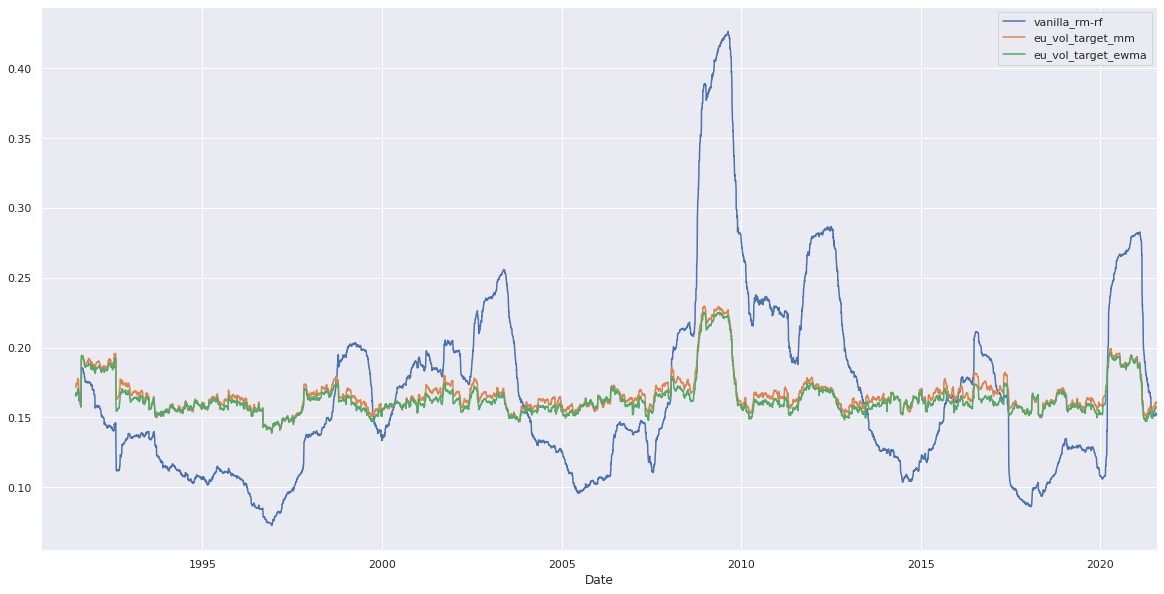

In [ ]:
eu_panel = pd.read_csv('/content/eu_vol_target.csv', index_col = 0, header = [0], parse_dates = ['Date'])

eu_rolling_vol = eu_panel.rolling(window=252).std() * np.sqrt(252)

eu_rolling_vol.plot()

print(eu_rolling_vol.std() * 100)

vanilla_rm-rf         5.373699
jp_vol_target_mm      1.239886
jp_vol_target_ewma    1.165422
dtype: float64


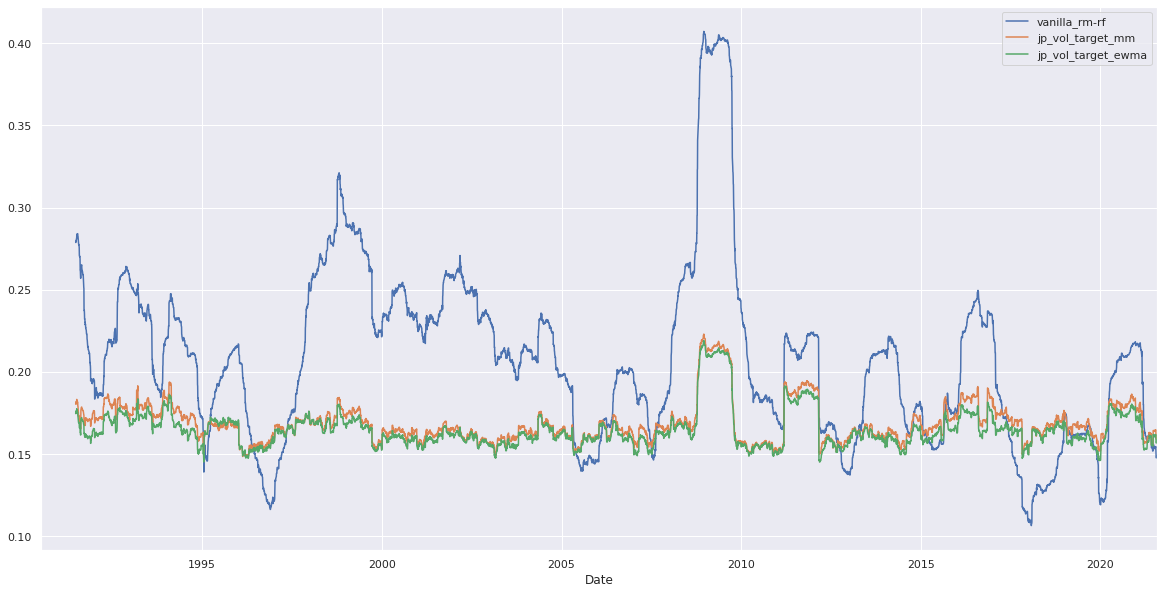

In [ ]:
jp_panel = pd.read_csv('/content/jp_vol_target.csv', index_col = 0, header = [0], parse_dates = ['Date'])

jp_rolling_vol = jp_panel.rolling(window=252).std() * np.sqrt(252)

jp_rolling_vol.plot()

print(jp_rolling_vol.std() * 100)

vanilla_rm-rf           6.223733
asia_vol_target_mm      1.473267
asia_vol_target_ewma    1.349049
dtype: float64


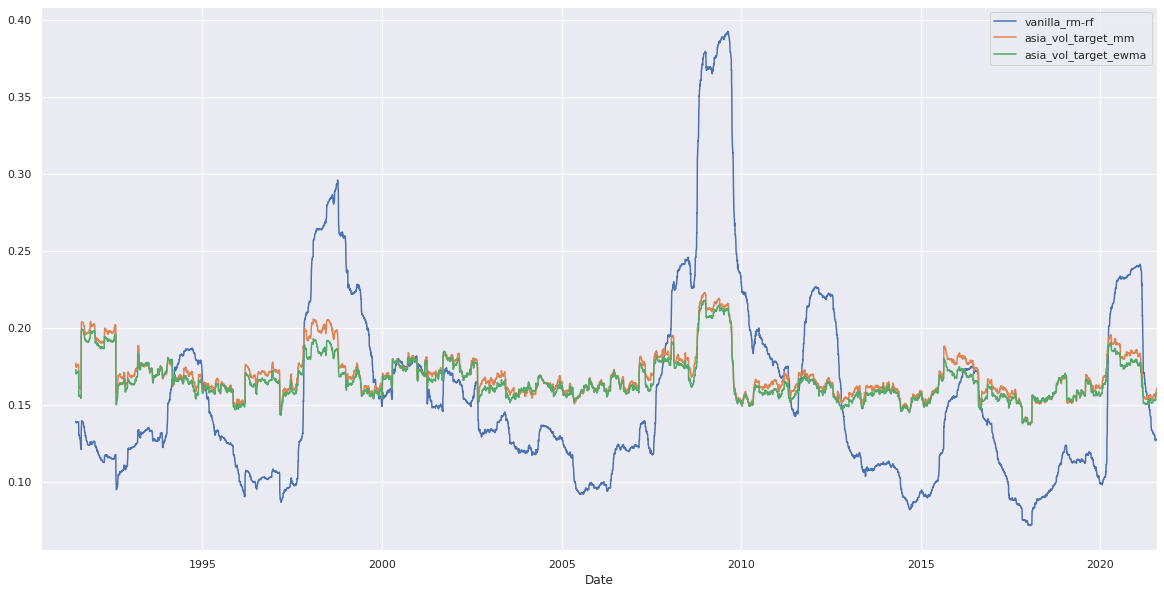

In [ ]:
asia_panel = pd.read_csv('/content/asia_vol_target.csv', index_col = 0, header = [0], parse_dates = ['Date'])

asia_rolling_vol = asia_panel.rolling(window=252).std() * np.sqrt(252)

asia_rolling_vol.plot()

print(asia_rolling_vol.std() * 100)

샤프 지수

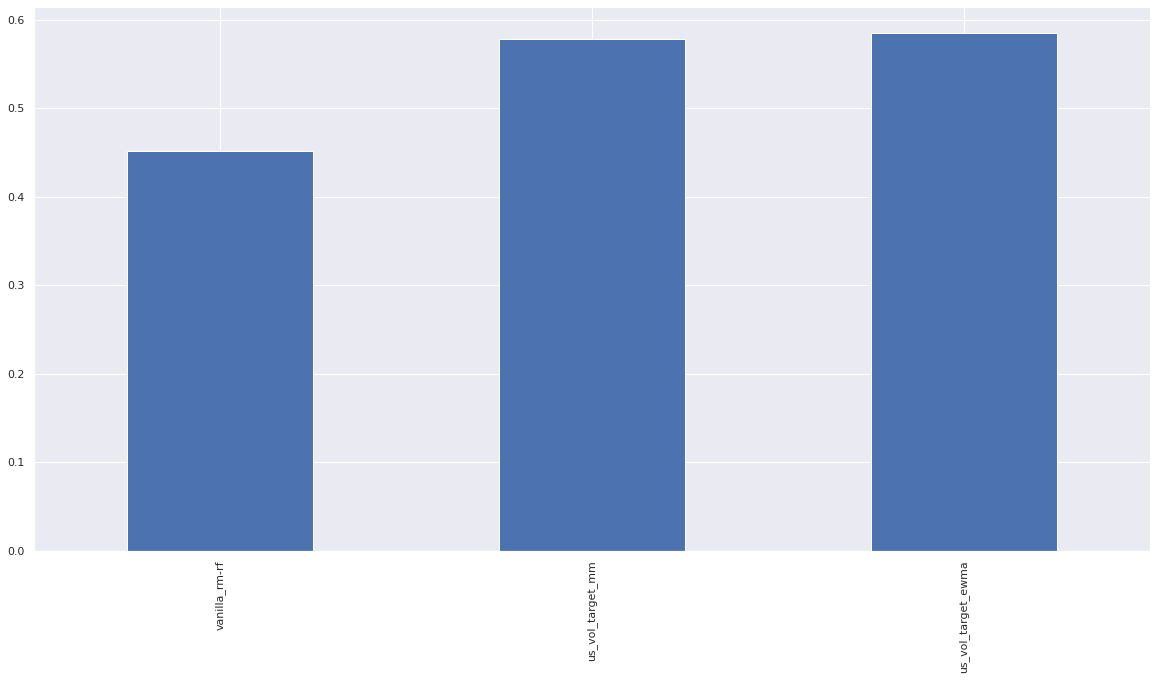

In [ ]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 252
rf = 0
sharpes = us_panel.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

In [ ]:
sharpes

vanilla_rm-rf         0.452387
us_vol_target_mm      0.578869
us_vol_target_ewma    0.585692
dtype: float64

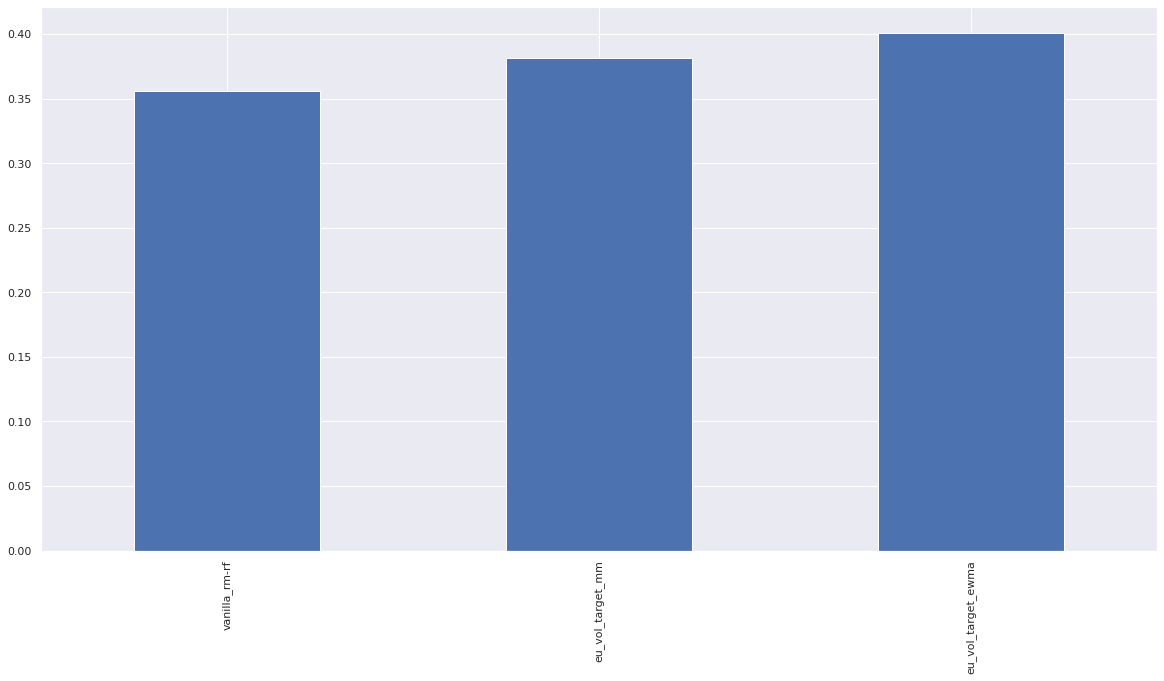

In [ ]:
sharpes = eu_panel.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

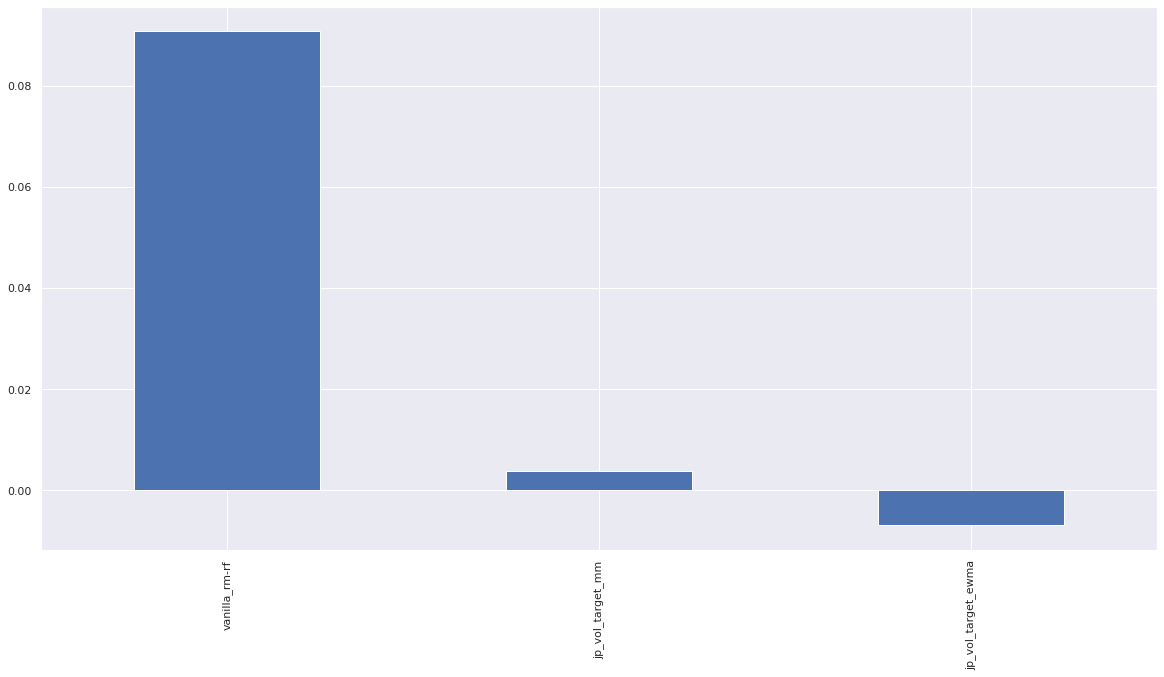

In [ ]:
sharpes = jp_panel.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

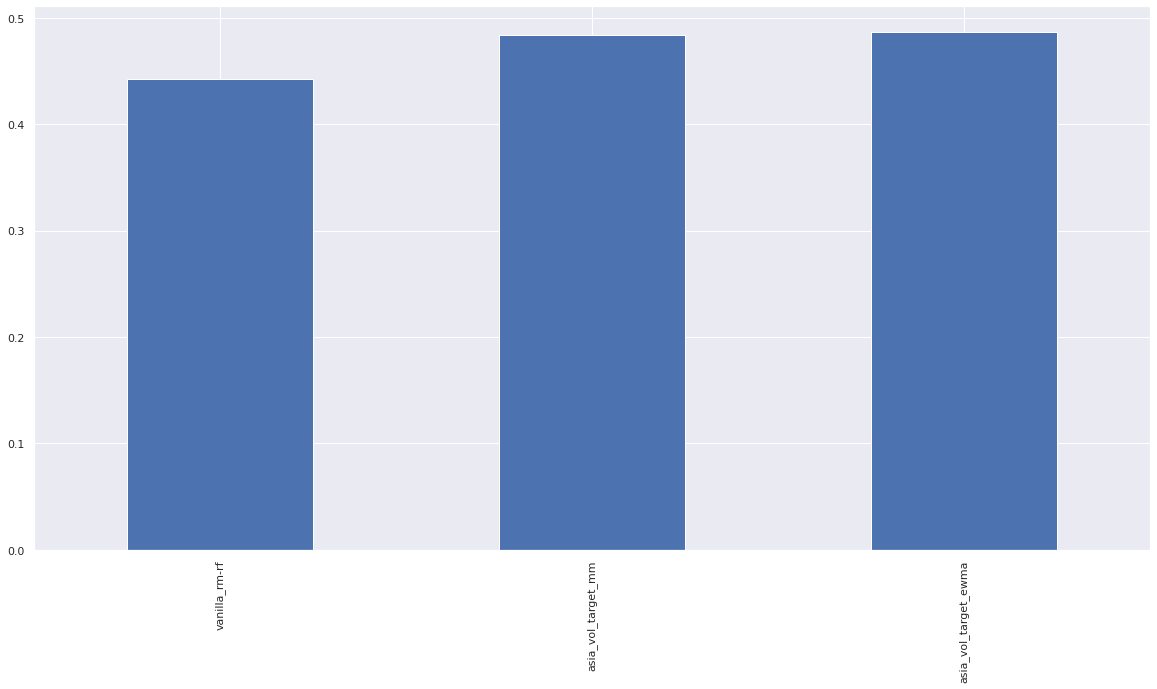

In [ ]:
sharpes = asia_panel.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

소르티노지수

Text(0, 0.5, 'Sortino Ratio')

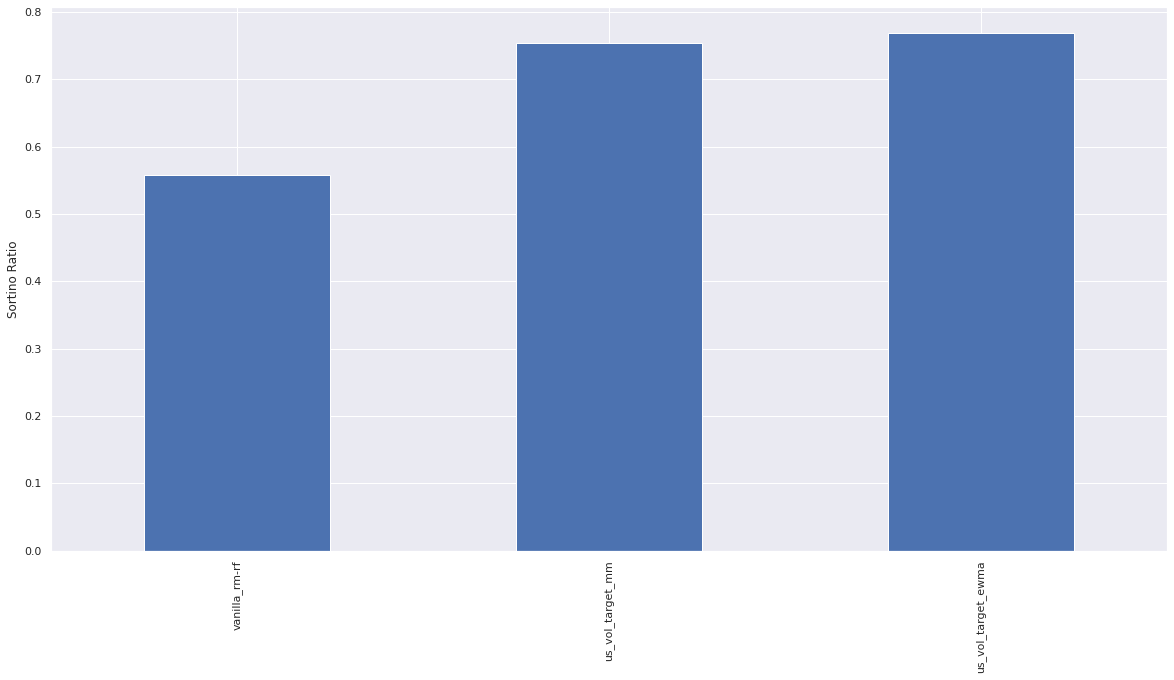

In [ ]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg

N = 252
rf = 0


sortinos = us_panel.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Sortino Ratio')

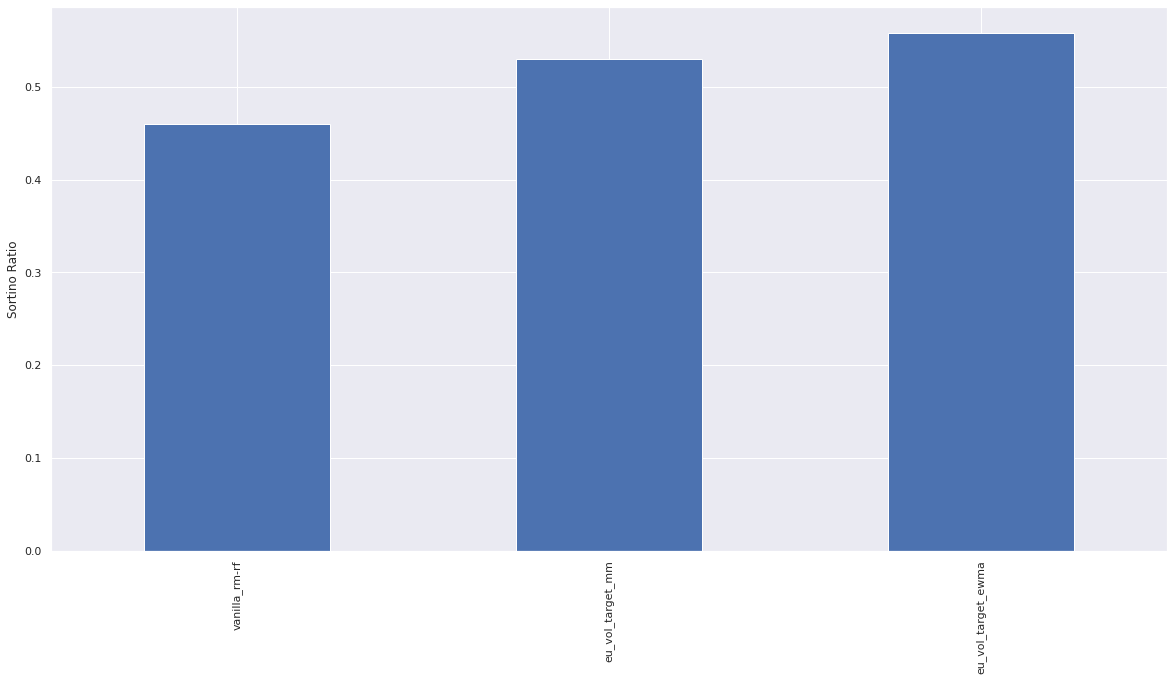

In [ ]:
sortinos = eu_panel.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Sortino Ratio')

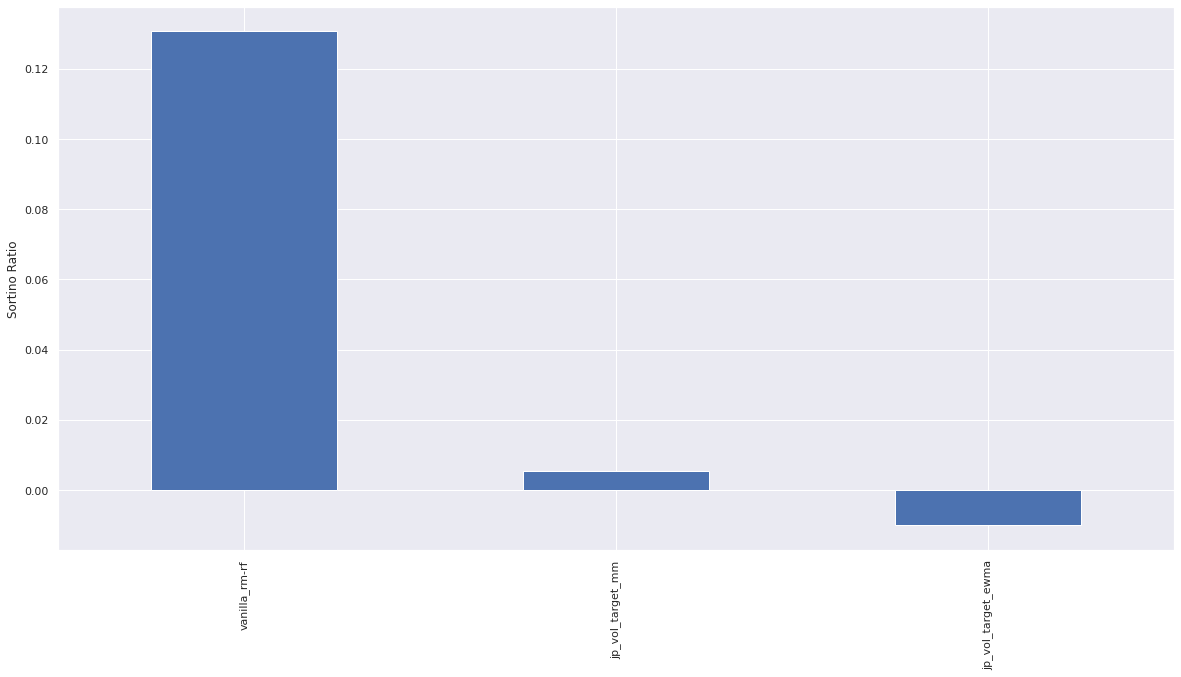

In [ ]:
sortinos = jp_panel.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

Text(0, 0.5, 'Sortino Ratio')

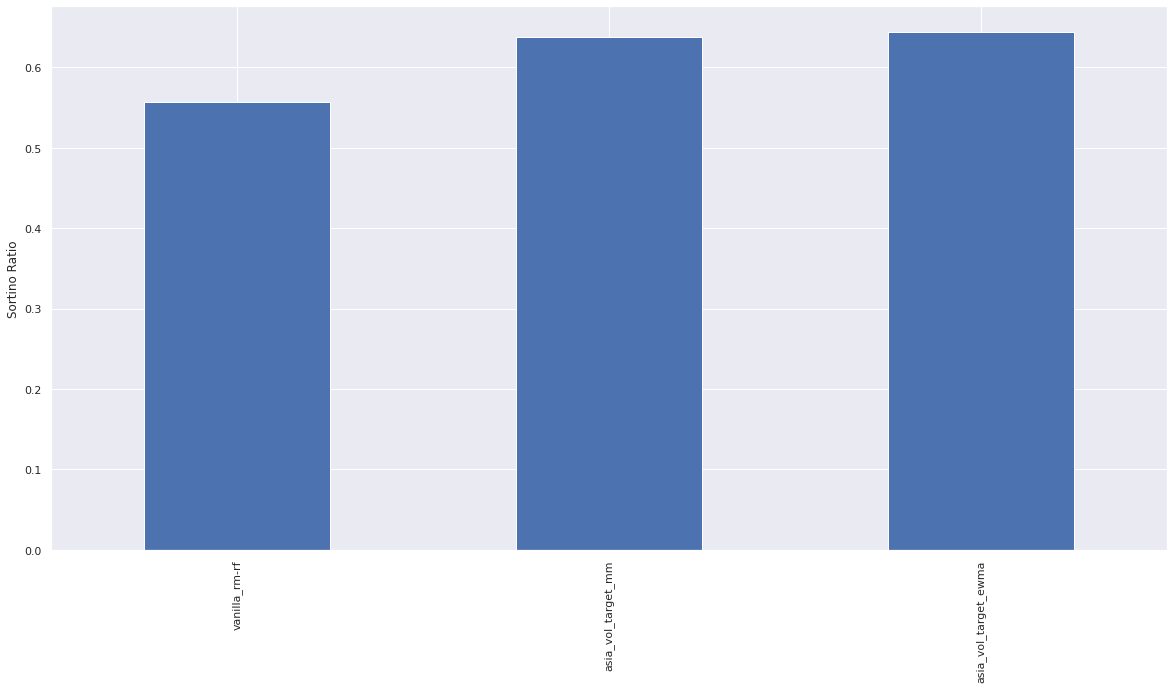

In [ ]:
sortinos = asia_panel.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')

monthly aggregate for SharpeTesting

In [ ]:
us_monthly = us_panel.resample('M').agg(lambda x: (x+1).prod() -1)
us_monthly.to_csv('us_monthly.csv')

In [ ]:
eu_monthly = eu_panel.resample('M').agg(lambda x: (x+1).prod() -1)
eu_monthly.to_csv('eu_monthly.csv')

In [ ]:
asia_monthly = asia_panel.resample('M').agg(lambda x: (x+1).prod() -1)
asia_monthly.to_csv('asia_monthly.csv')

In [ ]:
jp_monthly = jp_panel.resample('M').agg(lambda x: (x+1).prod() -1)
jp_monthly.to_csv('jp_monthly.csv')